# Atom-By-Atom Assembly of a Superfluid: Various Theory Calculations

### imports

In [18]:
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
from Analysis_Python_Files import MarksConstants as mc
from Analysis_Python_Files import Miscellaneous as misc
import IPython.display
matplotlib.style.use('dark_background')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from Analysis_Python_Files import MarksFourierAnalysis as fa
from IPython.display import HTML

# Phase Diagram Calculation

Based on Sachdev

(using t for dagger)

## Theory

$$
H_{MF} = \sum_i \Big( -\mu \hat{n}_{bi} + \frac{U}{2} \hat{n}_{bi}(\hat{n}_{bi}-1)-\Psi_B^* \hat{b}_i - \Psi_B \hat{b}^t_i \Big)
$$

This is the mean field hamiltonian for the bose hubbard model as given by Sachdev, eq. 9.7. I should get everything as $U/\mu$ and $w/\mu$ so lets go ahead and set $\mu$ to 1 and since the hamiltonian is a sum of independent hamiltonians, I consider just the single site hamiltonian and drop the site index.

$$
H'_{MF} = -\hat{n} + (U/2) \hat{n}(\hat{n}-1) - \Psi^*_B \hat{b} - \Psi_B \hat{b}^t
$$

An arbitrary state is:
$$
|\psi\rangle = \sum_x c_x |x\rangle
$$
where $b|x\rangle = \sqrt{x}|x-1\rangle$ and $b^t |x\rangle = \sqrt{x+1}|x+1\rangle$, and of course $\sum_x|c_x|^2 = 1$

$$
H'_{MF} |\psi\rangle = \lambda |\psi\rangle
$$

$$
H'_{MF}|\psi\rangle=\big(-\hat{n} + (U/2) \hat{n}(\hat{n}-1) - \Psi^*_B \hat{b} - \Psi_B \hat{b}^t\big)\sum_x c_x |x\rangle
$$

$$
= \sum_x\Bigg(c_x\Big[\big(-\mu x +(U/2)x(x-1)\big)|x\rangle-\Psi^*_B\sqrt{x}|x-1\rangle-\Psi_B\sqrt{x+1}|x+1\rangle)\big]\Bigg)
$$

$$
= \sum_{x=0}\Bigg(c_x\big(-\mu x +(U/2)x(x-1)\big)|x\rangle\Bigg)
-\sum_{x=0}\Bigg(c_x\Psi^*_B\sqrt{x}|x-1\rangle\Bigg)
-\sum_{x=0}\Bigg(c_x\Psi_B\sqrt{x+1}|x+1\rangle)\big]\Bigg)
$$

Let $x'=x-1$, $x''=x+1$:
$$
= \sum_{x=0}\Bigg(c_x\big(-\mu x +(U/2)x(x-1)\big)|x\rangle\Bigg)-
\sum_{x'=-1}\Bigg(c_{x'+1}\Psi^*_B\sqrt{x'+1}|x'\rangle\Bigg)-
\sum_{x''=1}\Bigg(c_{x''-1}\Psi_B\sqrt{x''}|x\rangle)\big]\Bigg)
$$

Note that in the first two sums, the first first term of the sum (x=0 and x'=-1 respectively) are zero, and I get rid of the non-necessary primes:

$$
= \sum_{x=1}\Bigg(c_x\big(-\mu x +(U/2)x(x-1)\big)|x\rangle\Bigg)-
\sum_{x=0}\Bigg(c_{x+1}\Psi^*_B\sqrt{x+1}|x\rangle\Bigg)-
\sum_{x=1}\Bigg(c_{x-1}\Psi_B\sqrt{x}|x\rangle)\big]\Bigg)
$$

$$
=-c_1\Psi_B^*|0\rangle + \sum_{x=1}\Bigg( c_x (-\mu x + \frac{U}{2}x(x-1)-c_{x+1}\Psi_B^*\sqrt{x+1}-c_{x-1}\Psi_B\sqrt{x} \Bigg)|x\rangle = \lambda\sum_x c_x |x\rangle
$$

And Now I equate all terms. For the zeroth term we have:
$$c_1\Psi_B^* = - \lambda c_0$$

And for all other terms,
$$
c_x\Big(\frac{U}{2}(x(x-1)) -\mu x\Big) - c_{x+1}\Psi^*_B \sqrt{x+1} - c_{x-1}\Psi_B\sqrt{x} = \lambda c_x
$$

Or:
$$
c_{x+1}\Psi^*_B \sqrt{x+1} = c_x\Big(\frac{U}{2}(x(x-1)) -\mu x-\lambda\Big) - c_{x-1}\Psi_B\sqrt{x}
$$

The series does not terminate. One way to solve for the eigenstates is to truncate the series at some high number of terms, say $n$ terms. Then I get a system of n equations with powers of lambda up to $\lambda^n$, giving me $n$ eigenstates, and I would then need to determine the lowest value and that's my ground state (or approximately, given that I included enough terms. What I expect to find is that even in the limit of infinite terms there exists a non-triial energy gap between the lowest and second lowest state if in the mott-instulating phase, and not so if in the superfluid phase.

---

The series does not terminate. I will need to truncate the series numerically and hope it doesn't affect my results (it shouldn't). To actually calcualte the series coefficeints for given values of $\mu$, $U$, and $...\lambda$?, I can start with c0=1 and calculate upwards using these equations. Then after I finish, I normalize.

Consider first the trivial case with no tunneling where clearly $\Psi_B=0$. The general condition becomes
$$
c_x\big(\frac{U}{2}(x(x-1))-\mu x\Big) = \lambda c_x\\
\frac{U}{2}(x(x-1))-\mu x = \lambda
$$


The $c_x$ term dropped out. This makes sense since there is no coupling between the differet $|x\rangle$ states in the hamiltonian with no tunneling. The energy spectrum is completely discrete since x is completely discrete. The first couple eigenvalues are
$\{0, -\mu, U-2\mu, 3U-3\mu, 6U-4\mu,...\}$
The ground state then is one of these depending on the relative values of $\mu$, For example, $\mu=U/2=1$:
$\{ 0, -1, 0, 3, 8, ... \}$
Interesting points arise with e.g. $\mu=U=1$
$\{ 0, -1, -1, 0, 2, ...\}$

This result is discussed around equation 9.10 in Sachdev.

---

I return to the general case, where I have 2 types of conditions.

$$\sum_x |c_x|^2 = 1$$

$$
c_{x+1}\Psi^*_B \sqrt{x+1} = c_x\Big(\frac{U}{2}(x(x-1)) -\mu x-\lambda\Big) - c_{x-1}\Psi_B\sqrt{x}
$$

For an eigenvalue equation I want an equation of the form $\bar{A}\vec{c} = \lambda \vec{c}$ where the $\vec{c}$ is the vector of all $c_x$ values, and $\bar{A}$ is the matrix I need to construct. 

Let me put the 2nd equation in a more suggestive form:

$$
c_{x+1}\Psi^*_B \sqrt{x+1} - c_x\Big(\frac{U}{2}(x(x-1)) - \mu x-\lambda\Big)+c_{x-1}\Psi_B\sqrt{x}= 0
$$

$$
c_{x-1}(-\Psi_B\sqrt{x}) + c_x\Big(\frac{U}{2}(x(x-1)) - \mu x\Big)+c_{x+1}(-\Psi^*_B \sqrt{x+1}) = \lambda c_x
$$

This give me an easy way to construct the matrix, I just need to evaluate the terms $\{(-\Psi_B \sqrt{x}), (\frac{U}{2}(x(x-1))-\mu x)), \text{and } -\Psi_B^* \sqrt{x+1})\}$ for each value of x until I truncate.

## Example 

Lets plug in a dummy values for $U=1$, $\mu=1/2$ and $\Psi_B=1$ to get some guidance:
$$
x=0: -c_1 = \lambda c_0\\
x=1: c_0(-1)+c_1(-\frac{1}{2})+c_2(-\sqrt{2})=\lambda c_1\\
x=2: c_1(-\sqrt{2})+c_2(0)+c_3(-\sqrt(3))=\lambda c_2\\
x=3: c_2(-\sqrt{3}) + c_3(\frac{3}{2})+c_4(-2) = \lambda c_3
$$

note that the last element, $c_4$, should be truncated, so $c_4$ = 0.

Giving me a matrix:
$$
A=
\begin{bmatrix}
0 & -1 & 0 & 0 \\
-1 & -\frac{1}{2} & -\sqrt{2} & 0 \\
0 & -\sqrt{2} & 0 & -\sqrt{3} \\
0 & 0 & -\sqrt{3} & \frac{3}{2}
\end{bmatrix}
$$

Let's get the eigenvalues of this:

In [22]:
A = np.array([[0,-1,0,0],
              [-1,-1/2,-np.sqrt(2),0],
              [0,-np.sqrt(2),0,-np.sqrt(3)],
              [0,0,-np.sqrt(3),3/2]])
print(A)
eigenvalues, eigenvectors = np.linalg.eig(A)
for val, vec in zip(eigenvalues, eigenvectors):
    print(val,': ',vec)

[[ 0.         -1.          0.          0.        ]
 [-1.         -0.5        -1.41421356  0.        ]
 [ 0.         -1.41421356  0.         -1.73205081]
 [ 0.          0.         -1.73205081  1.5       ]]
-2.281826577616841 :  [ 0.28998131 -0.68599434 -0.66025644 -0.09687123]
-0.49999999999999994 :  [ 0.66168707 -0.34299717  0.60627817  0.27739853]
0.9182465066839259 :  [ 0.62863935  0.48507125 -0.1411353  -0.59126921]
2.863580070932917 :  [ 0.28791254  0.42008403 -0.42020119  0.75104377]


this nice numpy function handles the normalization. Okay, lets move on to an automated calculation.

## Full Calc

$$
c_{x-1}(-\Psi_B\sqrt{x}) + c_x\Big(\frac{U}{2}(x(x-1)) - \mu x\Big)+c_{x+1}(-\Psi^*_B \sqrt{x+1}) = \lambda c_x
$$

In [132]:
def getMatrix(Psi, U_InteractionEnergy, mu_ChemPotential, truncSize):
    U_ = U_InteractionEnergy
    mu_ = mu_ChemPotential
    matrixA = np.zeros([truncSize,truncSize])
    for x_occupation_number in range(truncSize):
        x_ = x_occupation_number
        if x_ != 0:
            matrixA[x_, x_- 1 ] = - Psi * np.sqrt(x_)
        matrixA[x_, x_ ] = U_/2 * (x_ * (x_ - 1)) - mu_ * x_
        if x_ != truncSize-1:
            matrixA[x_, x_ + 1 ] = - np.conj(Psi) * np.sqrt(x_ + 1)
    return matrixA

In [133]:
def getGroundState(Psi, U_InteractionEnergy, mu_ChemPotential, truncSize):
    matrixA = getMatrix(Psi, U_InteractionEnergy, mu_ChemPotential, truncSize)
    eigVals, eigVecs = np.linalg.eig(matrixA)
    minIndex = np.argmin(eigVals)
    groundState = np.array([eigVecs[:,minIndex]]).conj().T
    groundStateE = eigVals[minIndex]
    return eigVals[minIndex], groundState

Value from above for truncSize = 4:  
-2.281826577616841 :  [ 0.28998131 -0.68599434 -0.66025644 -0.09687123]

In [134]:
getGroundState(1,1,0.5,4);
#[print(x) for x in getGroundState(1,1,0.5,4)];

matches perfectly. 

### testing convergence

In [135]:
E_0_vals = []
for truncSize in range(1,10):
    E_0, _ = getGroundState(1,1,0.5,truncSize)
    E_0_vals.append(E_0)

Text(0, 0.5, 'Calculated Ground State Energy $(U=1, \\mu = 0.5, \\Psi_B = 1)$')

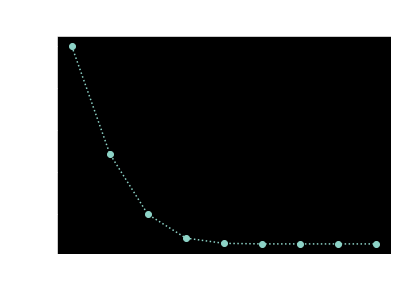

In [136]:
fig, ax = plt.subplots()
ax.plot(range(1,10), E_0_vals,'o:')
ax.set_xlabel('Truncation Size')
ax.set_ylabel(r'Calculated Ground State Energy $(U=1, \mu = 0.5, \Psi_B = 1)$')

converges very quickly, at least for these values.

### calculating $E_0$

Note that really what I'm calculating is $E_{MF}\{\Psi_B\}/M$.

$b^t$ has a matrix representation in e.g. 4 states:
$$
b^t =
\begin{bmatrix}
0 & \sqrt{1} & 0 & 0\\
0 & 0 & \sqrt{2} & 0\\
0 & 0 & 0 & \sqrt{3}\\
0 & 0 & 0 & 0
\end{bmatrix}
$$

In [307]:
def get_bdag(truncSize):
    bdag = np.zeros([truncSize, truncSize])
    # last row is zeros, hence -1
    for x_occupation_number in range(truncSize-1):
        x_ = x_occupation_number
        bdag[x_, x_+1] = np.sqrt(x_+1)
    return bdag
def get_b(truncSize):
    bdag = np.zeros([truncSize, truncSize])
    # last row is zeros, hence -1
    for x_occupation_number in range(1, truncSize):
        x_ = x_occupation_number
        bdag[x_, x_-1] = np.sqrt(x_)
    return bdag
def get_n(truncSize):
    return get_b(truncSize) @ get_bdag(truncSize)

In [308]:
print('b_dag = ',get_bdag(4))
print('b =', get_b(4))
print('n = ', get_n(4))

b_dag =  [[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]
b = [[0.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.        ]
 [0.         0.         1.73205081 0.        ]]
n =  [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 3.]]


In [38]:
def calc_bdag_exp(psi_coeff, bdag):
    # calculate <b^t>, or $\langle b^\dagger\rangle$
    # assumes psi_coeff is a normalized list of the coefficients of the number states, i.e.
    # c = psi_coeff
    # psi = c[0] |0> + c[1] |1> + etc.
    # b^t |x> = \sqrt{x+1} |x+1\rangle.
    # psi_coeff must be a column vector, i.e. must look like
    #   [[1],
    #    [2],
    #    [3]]
    return psi_coeff.conj().T @ bdag @ psi_coeff
    #np.matmul(psi_coeff.conj().T, np.matmul(bdag, psi_coeff))
    
def calc_b_exp(psi_coeff, b_):
    # calculate <b>, or $\langle b\rangle$
    return psi_coeff.conj().T @ b_ @ psi_coeff
    #np.matmul(psi_coeff.conj().T, np.matmul(b_, psi_coeff))

In [309]:
def calc_n_exp(psi_coeff, n_matrix):
    return psi_coeff.conj().T @ n_matrix @ psi_coeff

In [274]:
def calc_E0(Psi, U_InteractionEnergy, mu_ChemPotential, truncSize, w_tunneling, Z_neighbors, 
            b_dag, b_):
    if Psi < 0: 
        return 1e5
    w_ = w_tunneling
    Z_ = Z_neighbors
    E_MF, vec_c = getGroundState(Psi, U_InteractionEnergy, mu_ChemPotential, truncSize)
    #print(vec_c)
    bdag_exp = calc_bdag_exp(vec_c, b_dag)[0,0]
    b_exp = calc_b_exp(vec_c, b_)[0,0]
    t1 = Z_ * w_ * bdag_exp * b_exp
    t2 = np.conj(Psi) * b_exp
    t3 = Psi * bdag_exp
    #print(E_MF, t1, t2, t3)
    return E_MF - t1 + t2 + t3

In [ ]:
trunc = 10000
calc_E0( 0, 1, 0.5, trunc, 0, 2,
         get_bdag(trunc), get_b(trunc) )

In [160]:
import scipy.optimize as opt

### Phase Diagram Calculation

In [298]:
from IPython.display import clear_output

In [317]:
interactionEnergy = 1
truncationSize = 10
bdag_matrix = get_bdag(truncationSize)
b_matrix = get_b(truncationSize)
n_matrix = get_n(truncationSize)
tunnelingEnergy = 1
neighbors = 2
num_w_vals = 100
num_mu_vals = 100
nbarVals, minPsiVals = [np.zeros([num_mu_vals, num_w_vals]) for _ in range(2)]
w_vals = np.linspace(0, 0.15, num_w_vals)
mu_vals = np.linspace(0, 3, num_mu_vals)

for w_inc, tunnelingEnergy in enumerate(w_vals):
    clear_output()
    print(misc.round_sig_str(w_inc / num_w_vals * 100) + ' %')
    for mu_inc, chemicalPotential in enumerate(mu_vals):
        minimizeFunc = lambda Psi : calc_E0( Psi, interactionEnergy, chemicalPotential, 
                                             truncationSize, tunnelingEnergy, neighbors, 
                                             bdag_matrix, b_matrix );
        minPsi = opt.minimize(minimizeFunc, 0.4).x
        gsE, geV = getGroundState(minPsi, interactionEnergy, chemicalPotential, truncationSize)
        nbarVals[mu_inc, w_inc] = calc_n_exp(geV, n_matrix)
        minPsiVals[mu_inc, w_inc] = minPsi;

99.0 %


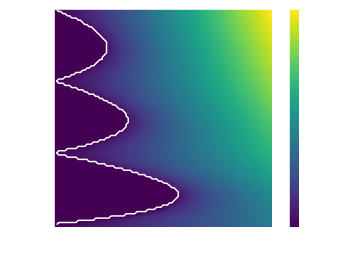

In [342]:
fig, ax = plt.subplots()
im = ax.imshow(minPsiVals, origin='bottom')
ax.contour(minPsiVals, origin='lower', levels=[0.0001], colors=['w'])
tickLocs = [0,33,66,99]
ax.set_xticks(tickLocs)
ax.set_xticklabels([misc.round_sig_str(w_vals[loc]) for loc in tickLocs])
ax.set_yticks(tickLocs)
ax.set_yticklabels([misc.round_sig_str(mu_vals[loc]) for loc in tickLocs])
ax.set_xlabel(r'$J/U$')
ax.set_ylabel(r'$\mu/U$')
fig.colorbar(im, label=r'Order Parameter $\Psi$');

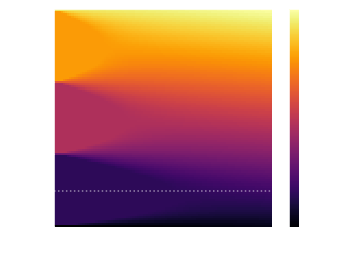

In [329]:
fig, ax = plt.subplots()
im = ax.imshow(nbarVals, origin='bottom', cmap='inferno')
tickLocs = [0,33,66,99]
ax.set_xticks(tickLocs)
ax.set_xticklabels([misc.round_sig_str(w_vals[loc]) for loc in tickLocs])
ax.set_yticks(tickLocs)
ax.set_yticklabels([misc.round_sig_str(mu_vals[loc]) for loc in tickLocs])
ax.set_xlabel(r'$J/U$')
ax.set_ylabel(r'$\mu/U$')
index_0p5 = np.argmin(abs(mu_vals - 0.5));
ax.axhline(index_0p5,linestyle=':', alpha=0.5)
fig.colorbar(im, label=r'Occupation Density $\langle n \rangle$');

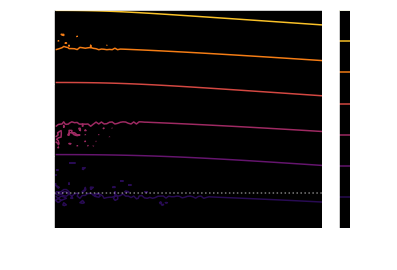

In [331]:
fig, ax = plt.subplots()
im = ax.contour(nbarVals, origin='lower', cmap='inferno')
tickLocs = [0,33,66,99]
ax.set_xticks(tickLocs)
ax.set_xticklabels([misc.round_sig_str(w_vals[loc]) for loc in tickLocs])
ax.set_yticks(tickLocs)
ax.set_yticklabels([misc.round_sig_str(mu_vals[loc]) for loc in tickLocs])
ax.set_xlabel(r'$J/U$')
ax.set_ylabel(r'$\mu/U$')
index_0p5 = np.argmin(abs(mu_vals - 0.5));
ax.axhline(index_0p5,linestyle=':', alpha=0.5)
fig.colorbar(im, label=r'Occupation Density $\langle n \rangle$');

$$
\frac{E_0}{ M} = \frac{E_{MF}\{\Psi_B\}}{M} - Zw\langle \hat{b}^t\rangle\langle \hat{b}\rangle + \langle \hat{b} \rangle \Psi^*_B + \langle \hat{b}^t \rangle \Psi_B
$$

# Other

## Trap Considerations

From the grimm paper OPTICAL DIPOLE TRAPS FOR NEUTRAL ATOMS 

$$
\omega_r = \sqrt{\frac{4V}{m_{\text{Rb}}w_0^2}},\\
\omega_z=\sqrt{\frac{2V}{mz_R^2}}=\sqrt{\frac{2\lambda^2 V}{m\pi^2 w_0^4}}
$$

$$z_r = \pi w_0^2/\lambda$$

### Harmonic Oscillator Wavefunction

$$
\psi_0 \{x\} = \Big(\frac{m\omega}{\pi\hbar}\Big)^{1/4} \exp\Big\{\frac{-m\omega x^2}{2\hbar}\Big\} = \Big(\frac{1}{\pi\sigma_x^2}\Big)^{1/4} \exp\Big\{\frac{-x^2}{2\sigma_x^2}\Big\} 
$$
$$
P\{x\}=\psi_0^2\{x\} = \Big(\frac{1}{\pi\sigma_x^2}\Big)^{1/2} \exp\Big\{\frac{-x^2}{\sigma_x^2}\Big\} 
$$

$\text{Gaussian} = \exp\{-2x^2/w_0^2\}$

$$
\sigma_{\psi\{x\}} = \sqrt{\frac{\hbar}{m\omega}};   \sigma_{P\{x\}} = \sqrt{\frac{\hbar}{2m\omega}}
$$

$\nu_\text{rad} = N_\text{rad}\sqrt{D}$  
$\nu_\text{ax} = N_\text{ax}\sqrt{D}$  
with N some constant, depth in mK in this notebook gives $N_{rad} = 150$ kHz, $N_{ax} = 35$ kHz

In [11]:
sigx_d(1e-2, Nrad) * 1e9 * np.sqrt(2)

88.05320017071948

In [12]:
sigx_d(1e-3, Nrad) * 1e9 * np.sqrt(2)

156.58319285162622

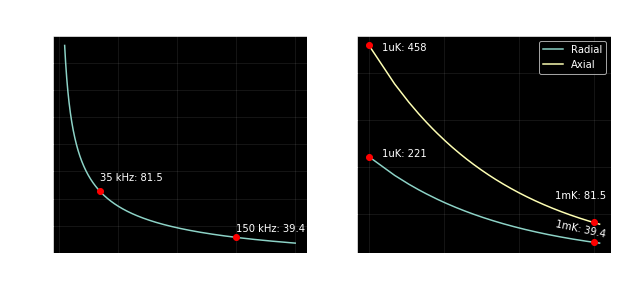

In [9]:
freqs = np.linspace(5e3, 200e3, 1000)
depths = np.linspace(0.001,1.2,1000)
Nrad = 150e3
Nax = 35e3
def sigx(nu):
    return np.sqrt(mc.hbar/(mc.Rb87_M * 4 * np.pi * nu))
def wx_n(nu):
    return 2*sigx(nu)*1e9
def sigx_d(D, N):
    nu = N * np.sqrt(D)
    return sigx(nu)
def wx_d_n(D,N):
    nu = N * np.sqrt(D)
    return sigx_n(nu)
    
fig, axs = plt.subplots(1,2, figsize=(10,4))
ax = axs[0]
ax2 = axs[1]
ax.plot(freqs*1e-3, wx_n(freqs))
ax2.semilogx(depths, wx_d_n(depths, Nrad), label='Radial')
ax2.semilogx(depths, wx_d_n(depths, Nax), label='Axial')
ax2.legend()
ax2.grid(alpha=0.1)
ax2.set_xlabel('Trap Depth (mK)')
ytxt = r'Probability Density $1/e^2$ Waist $w_0$ (nm)'
ax2.set_ylabel(ytxt)
ax.set_xlabel('Trap Frequency (kHz)')
ax.set_ylabel(ytxt);
ax.grid(alpha=0.1)
axFreq = 35e3
radFreq = 150e3
ax.text(axFreq*1e-3,wx_n(axFreq)+10, misc.round_sig_str(axFreq*1e-3,2) + ' kHz: '+ misc.round_sig_str(wx_n(axFreq)))
ax.text(radFreq*1e-3,wx_n(radFreq)+5, misc.round_sig_str(radFreq*1e-3) + ' kHz: '+ misc.round_sig_str(wx_n(radFreq)))
ax2.text(0.3,wx_d_n(1, Nrad) + 10, '1mK: '+ misc.round_sig_str(wx_d_n(1, Nrad)),rotation=-12)
ax2.text(0.3,wx_d_n(1, Nax) + 50, '1mK: '+ misc.round_sig_str(wx_d_n(1, Nax)))
ax2.text(1.5e-3,wx_d_n(1e-3, Nrad), '1uK: '+ misc.round_sig_str(wx_d_n(1e-3, Nrad)))
ax2.text(1.5e-3,wx_d_n(1e-3, Nax)-10, '1uK: '+ misc.round_sig_str(wx_d_n(1e-3, Nax)))
ax.plot([axFreq * 1e-3,radFreq * 1e-3], [wx_n(axFreq), wx_n(radFreq)], 'ro')
ax2.plot([1, 1], [wx_d_n(1, Nrad), wx_d_n(1, Nax)], 'ro')
ax2.plot([1e-3, 1e-3], [wx_d_n(1e-3, Nrad), wx_d_n(1e-3, Nax)], 'ro')
fig.suptitle('Ground State Wavefunction Size');

## U Calculations

$$
U_{0,0} = \frac{4\pi \hbar ^2 a_s}{m} \int [d^3 r] |\psi_n\{r\}|^4
$$

1D Ground State Wavefunction:
$$
\psi_0\{x\} = \Big( \frac{m\omega}{\pi \hbar}\Big)^{1/4} \exp\Big\{ -\frac{m\omega x^2}{2\hbar} \Big\}
$$

3D Ground State Wavefunction:
$$
\psi_0\{x,y,z\} = \Big( \frac{m(\omega_x\omega_y\omega_z)^{1/3}}{\pi \hbar}\Big)^{3/4} \exp\Big\{ -\frac{m(\omega_x x^2+\omega_y y^2 + \omega_z z^2}{2\hbar} \Big\}
$$

Assume $\omega_x \approx \omega_y = \omega_r$

$$
U_{0,0} = \frac{4\pi \hbar ^2 a_s}{m} \Big( \frac{m}{\pi\hbar} \Big)^3 \omega_r^2 \omega_z\int [d^3 r] \exp\Big\{ -\frac{2m(\omega_x x^2+\omega_y y^2 + \omega_z z^2)}{\hbar}\Big\} 
$$

Gaussian Integral:
$\int [dx] \exp\{-ax^2\} = \sqrt{\frac{\pi}{a}}$

$$
U_{0,0} = \frac{4\pi \hbar ^2 a_s}{m} \Big( \frac{m}{\pi\hbar} \Big)^3 \omega_r^2 \omega_z [\sqrt{\frac{\pi\hbar}{2m\omega_r}}]^2[\sqrt{\frac{\pi\hbar}{2m\omega_z}}] \\
= \frac{2\pi \hbar ^2 a_s}{\sqrt{2}m} \Big( \frac{m}{\pi\hbar} \Big)^{3/2} \omega_r \sqrt{\omega_z}
$$

$$
U_{0,0} = \sqrt{\frac{2m\hbar\omega_r^2\omega_z a_s^2}{\pi}} = 
$$

$$
U_{0,0} = \sqrt{\frac{2m\hbar\omega_r^2\omega_z a_s^2}{\pi}} = \sqrt{\frac{4V}{mw_0^2}}\Big(\frac{2\lambda^2 V}{m\pi^2 w_0^4}\Big)^{1/4}\sqrt{\frac{2m\hbar a_s^2}{\pi}}
$$

$$
U_{0,0} = \frac{2a_s}{\pi w_0^2}\Big(\frac{8\lambda^2\hbar^2 V^3}{m}\Big)^{1/4}\propto V^{3/4}
$$

## J Calculations

... harder

## $\mu$ Calculations

... much harder...

# TOF Imaging Calculations

## Imaging Signal Analysis

Trying to calculate how much imaging signal I expect and various imaging issues

## Momentum Space Analysis

#### Fourier Transform of a gaussian

In [12]:
from fitters.Gaussian import bump,arb_1d_sum

In [26]:
# Define the field
numberOfPoints = 2**14
squareLength = 2
dataRange = 32 * squareLength
# Calculate the field
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)

##### Gaussian

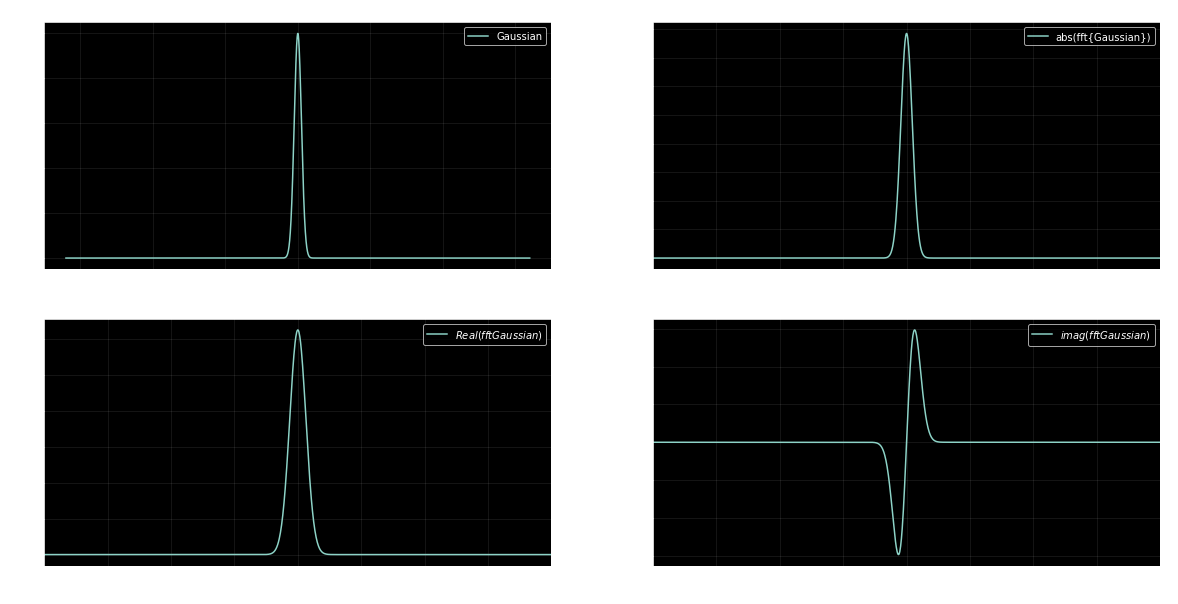

In [73]:
field = bump.f(xpts,1,0,0.5,0)
fftData = fa.fft(field, xpts)
fig, ax = plt.subplots(2,2,figsize=(20,10))
lims = [[-35,35],[-10,10],[-10,10],[-10,10]]
xplt = [xpts, fftData['Freq'], fftData['Freq'], fftData['Freq']]
yplt = [field, abs(fftData['Field'])**2, fftData['Field'].real, fftData['Field'].imag]
labels=['Gaussian', 'abs(fft{Gaussian})', '$Real(fft{Gaussian})$', '$imag(fft{Gaussian})$']
xlabels= [ 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = ['Gaussian', 'F{Gaussian}', 'F{Gausian}', 'F{Gaussian}']
for a, lim, xp, yp, legLabel, xlabel, ylabel, title in zip(ax.flatten(), lims, xplt, yplt, labels, xlabels, ylabels, titles):
    a.plot(xp,yp, label=legLabel)
    a.set_xlim(lim)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.set_title(title)
    a.legend()
    a.grid(alpha=0.1)

### shifted gaussian

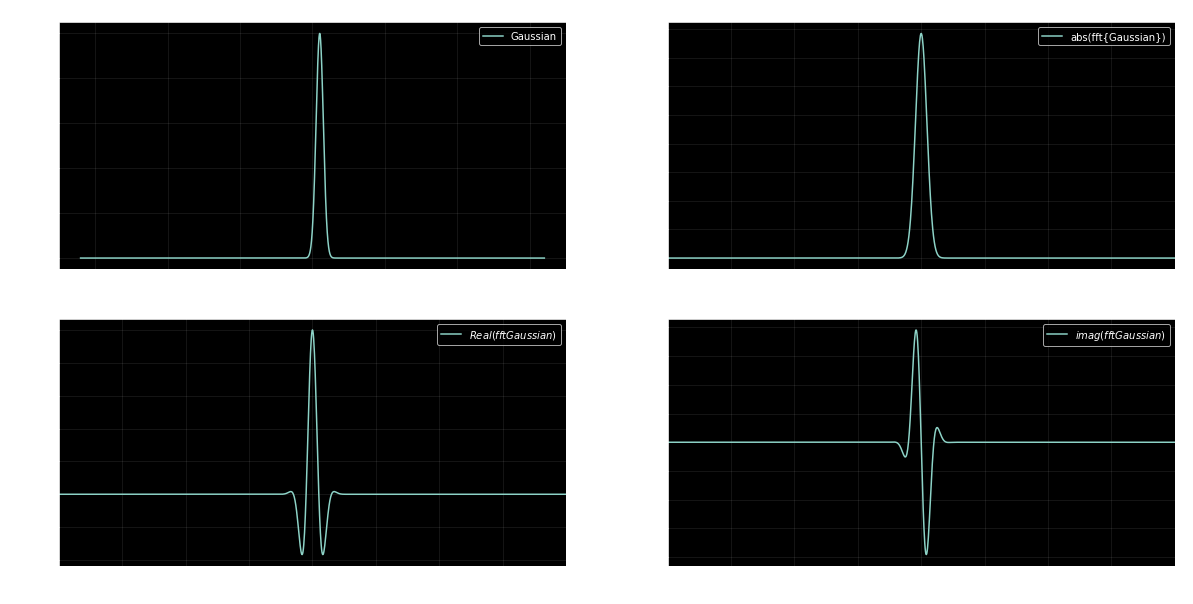

In [74]:
field = bump.f(xpts,1,1,0.5,0)
fftData = fa.fft(field, xpts)
fig, ax = plt.subplots(2,2,figsize=(20,10))
lims = [[-35,35],[-10,10],[-10,10],[-10,10]]
xplt = [xpts, fftData['Freq'], fftData['Freq'], fftData['Freq']]
yplt = [field, abs(fftData['Field'])**2, fftData['Field'].real, fftData['Field'].imag]
labels=['Gaussian', 'abs(fft{Gaussian})', '$Real(fft{Gaussian})$', '$imag(fft{Gaussian})$']
xlabels= [ 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = ['Gaussian', 'F{Gaussian}', 'F{Gausian}', 'F{Gaussian}']
for a, lim, xp, yp, legLabel, xlabel, ylabel, title in zip(ax.flatten(), lims, xplt, yplt, labels, xlabels, ylabels, titles):
    a.plot(xp,yp, label=legLabel)
    a.set_xlim(lim)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.set_title(title)
    a.legend()
    a.grid(alpha=0.1)

### 2 Gaussians

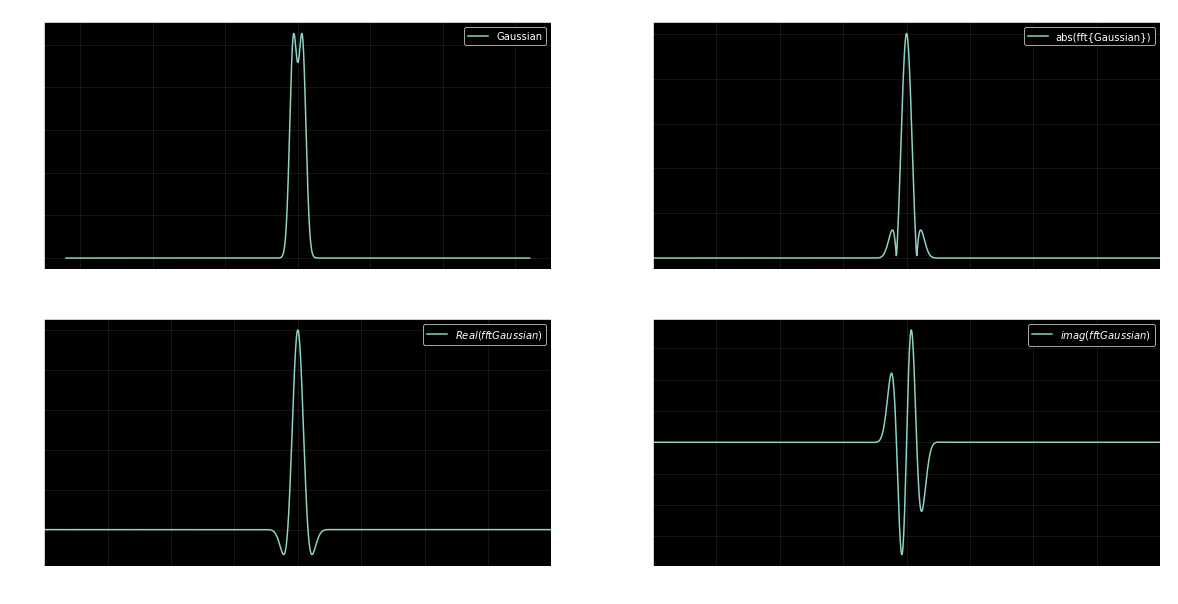

In [76]:
nGauss = 2
params = np.array([0])
spacing = 1.25
for g in range(nGauss):
    params = np.append(params, [1, -(spacing * (nGauss-1))/2 + g*spacing, 0.5])
field = arb_1d_sum.f(xpts, *params)
#field = bump.f(xpts,1,1,0.5,0)+bump.f(xpts,1,-1,0.5,0)
fftData = fa.fft(field, xpts)
fig, ax = plt.subplots(2,2,figsize=(20,10))
lims = [[-35,35],[-10,10],[-10,10],[-10,10]]
xplt = [xpts, fftData['Freq'], fftData['Freq'], fftData['Freq']]
yplt = [field, abs(fftData['Field']), fftData['Field'].real, fftData['Field'].imag]
labels=['Gaussian', 'abs(fft{Gaussian})', '$Real(fft{Gaussian})$', '$imag(fft{Gaussian})$']
xlabels= [ 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = ['Gaussian', 'F{Gaussian}', 'F{Gausian}', 'F{Gaussian}']
for a, lim, xp, yp, legLabel, xlabel, ylabel, title in zip(ax.flatten(), lims, xplt, yplt, labels, xlabels, ylabels, titles):
    a.plot(xp,yp, label=legLabel)
    a.set_xlim(lim)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.set_title(title)
    a.legend()
    a.grid(alpha=0.1)

### 3 Gaussians

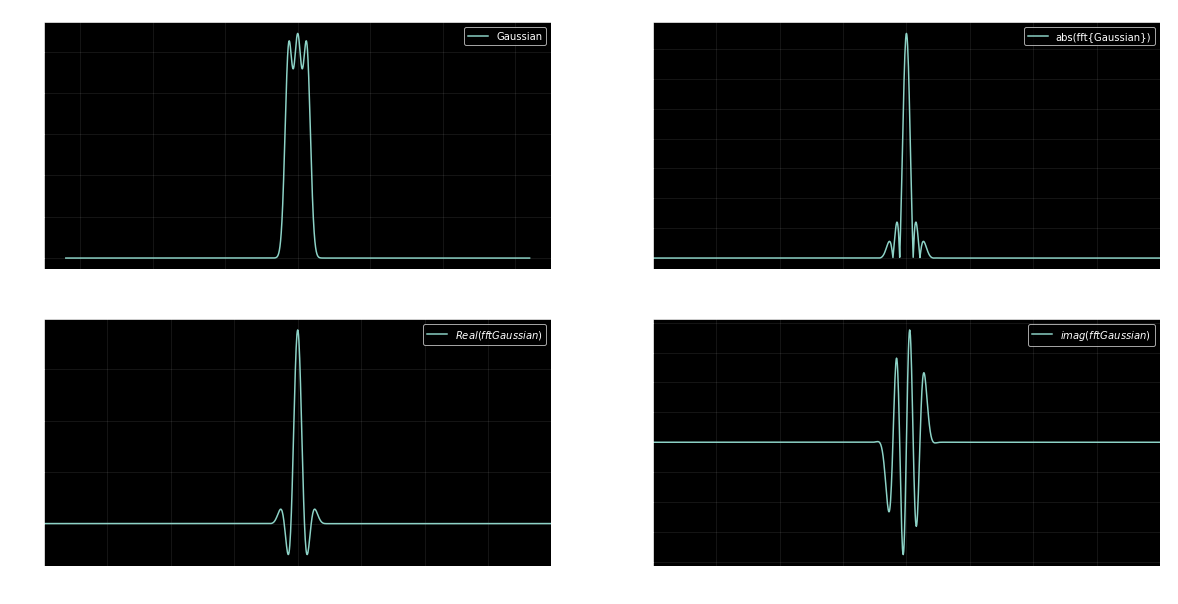

In [77]:
nGauss = 3
params = np.array([0])
spacing = 1.25
for g in range(nGauss):
    params = np.append(params, [1, -(spacing * (nGauss-1))/2 + g*spacing, 0.5])
field = arb_1d_sum.f(xpts, *params)
#field = bump.f(xpts,1,1,0.5,0)+bump.f(xpts,1,-1,0.5,0)
fftData = fa.fft(field, xpts)
fig, ax = plt.subplots(2,2,figsize=(20,10))
lims = [[-35,35],[-10,10],[-10,10],[-10,10]]
xplt = [xpts, fftData['Freq'], fftData['Freq'], fftData['Freq']]
yplt = [field, abs(fftData['Field']), fftData['Field'].real, fftData['Field'].imag]
labels=['Gaussian', 'abs(fft{Gaussian})', '$Real(fft{Gaussian})$', '$imag(fft{Gaussian})$']
xlabels= [ 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = ['Gaussian', 'F{Gaussian}', 'F{Gausian}', 'F{Gaussian}']
for a, lim, xp, yp, legLabel, xlabel, ylabel, title in zip(ax.flatten(), lims, xplt, yplt, labels, xlabels, ylabels, titles):
    a.plot(xp,yp, label=legLabel)
    a.set_xlim(lim)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.set_title(title)
    a.legend()
    a.grid(alpha=0.1)

### 11 Gaussians

In [194]:
# Define the field
numberOfPoints = 2**15
squareLength = 2
dataRange = 128 * squareLength
# Calculate the field
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)

In [325]:
# the spatial units here are in units where the trap waist = 1. The waist factor is the ratio between 
# the trap waist and the wavefunction waist. NOTE: Important that it's the wavefunction waist (i.e. 1/e^2 point) 
# and not the probability density waist. the momentum space distribution is the fourier transform of the wavefunction, 
# not of the probability density. 
waistFactor = 1
#spacings = np.linspace(1,10,500)
spacings = np.logspace(1, -0.3, 500)
nGauss = 11
fieldArray = []
fftDataArray = []
trapsArray = []
for spacing in spacings:
    wfparams = np.array([0])
    trapParams = np.array([0])
    for g in range(nGauss):
        wfparams = np.append(wfparams, [1, -(spacing * (nGauss-1))/2 + g*spacing, 0.5 * waistFactor] )
        trapParams = np.append(trapParams, [1, -(spacing * (nGauss-1))/2 + g*spacing, 0.5] )
    trapsArray.append(arb_1d_sum.f(xpts, *trapParams))
    fieldArray.append(arb_1d_sum.f(xpts, *wfparams))
    fftDataArray.append(fa.fft(fieldArray[-1], xpts))

#### simple plot

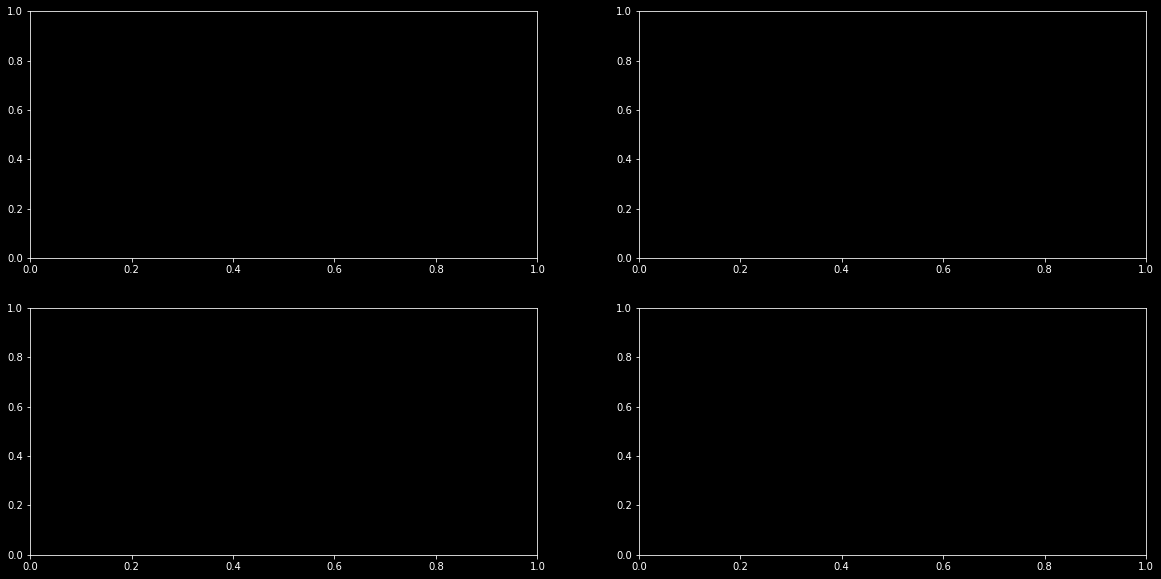

In [324]:
nGauss = 11
params = np.array([0])
spacing = 11
for g in range(nGauss):
    params = np.append(params, [1, -(spacing * (nGauss-1))/2 + g*spacing, 0.5])
field = arb_1d_sum.f(xpts, *params)
#field = bump.f(xpts,1,1,0.5,0)+bump.f(xpts,1,-1,0.5,0)
fftData = fa.fft(field, xpts)
fig, y = plt.subplots(2,2,figsize=(20,10))
lims = [[-35,35],[-10,10],[-10,10],[-10,10]]
xplt = [xpts, fftData['Freq'], fftData['Freq'], fftData['Freq']]
yplt = [field, abs(fftData['Field']), fftData['Field'].real, fftData['Field'].imag]
labels=['Gaussian', 'abs(fft{Gaussian})', '$Real(fft{Gaussian})$', '$imag(fft{Gaussian})$']
xlabels= [ 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = ['Gaussian', 'F{Gaussian}', 'F{Gausian}', 'F{Gaussian}']
for a, lim, xp, yp, legLabel, xlabel, ylabel, title in zip(ax.flatten(), lims, xplt, yplt, labels, xlabels, ylabels, titles):
    a.plot(xp,yp, label=legLabel)
    a.set_xlim(lim)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.set_title(title)
    a.legend()
    a.grid(alpha=0.1)

#### animation

In [326]:
fig, ax = plt.subplots(1,3,figsize=(14,5))
plt.subplots_adjust(hspace=0.4, wspace=0.1)
fourierLims = [-2.2,2.2]
xlims = [[-35,35], [-35,35], fourierLims, fourierLims, fourierLims]
ylims = [[0,3], None, None, None, None]
init = 0
xplt = [xpts, xpts, fftDataArray[init]['Freq'], fftDataArray[init]['Freq'], fftDataArray[init]['Freq']]
yplt = [trapsArray[init], fieldArray[init], abs(fftDataArray[init]['Field'])**2, fftDataArray[init]['Field'].real, fftDataArray[init]['Field'].imag]
labels=['Tweezers', 'Wavefunctions', 'abs(fft{Wvfn})', '$Real(fft{Wvfn})$', '$imag(fft{Wvfn})$']
xlabels= [ 'Space (arb)', 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = [r'$U\{x\}$', r'$\psi\{x\}$', r'$|\Phi\{p\}|^2$', r'$\Phi\{p\}$', r'$\Phi\{p\}$']
lines = []
for a, xlim, xp, yp, legLabel, xlabel, ylabel, title, ylim in zip(ax.flatten(), xlims, xplt, yplt, labels, xlabels, ylabels, titles, ylims):
    l, = a.plot(xp,yp, label=legLabel,color='b')
    lines.append(l)
    a.set_xlim(xlim)
    a.set_ylim(ylim)
    a.set_yticks([])
    a.set_title(title, fontsize=10)
    a.legend(fontsize=6, loc='center right')
    a.grid(alpha=0.1)

# initialization function: plot the background of each frame
def init():
    for l in lines:
        l.set_data([],[])
    return (line,)

# animation function. This is called sequentially.
def animate(frameNumber):
    if animate.markerNumber == 0:
        if spacings[frameNumber] < 4:
            animate.markerNumber = frameNumber
            lines[0].set_color('r')
    if frameNumber - animate.markerNumber < 100 and animate.markerNumber != 0:
        frameNumber = animate.markerNumber
        fn = frameNumber
    elif animate.markerNumber != 0:
        fn = frameNumber - 100
    else:
        fn = frameNumber
    #print('mn',animate.markerNumber)
    #print('fn',fn)
    yplt = [trapsArray[fn], fieldArray[fn], abs(fftDataArray[fn]['Field'])**2, 
            fftDataArray[fn]['Field'].real, fftDataArray[fn]['Field'].imag]
    for line, xp, yp in zip(lines, xplt, yplt):
        line.set_data(xp, yp)
    return lines
animate.markerNumber = 0
#animate(400);
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation( fig, animate, init_func=init, frames=600, interval=20, blit=True)
plt.close()
HTML(anim.to_html5_video())

#### interactive

In [105]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(bottom=0.25, hspace=0.6, wspace=0.2)
fourierLims = [-2,2]
lims = [[-35,35], fourierLims,fourierLims,fourierLims]
init = 0
xplt = [xpts, fftDataArray[init]['Freq'], fftDataArray[init]['Freq'], fftDataArray[init]['Freq']]
yplt = [fieldArray[init], abs(fftDataArray[init]['Field']), fftDataArray[init]['Field'].real, fftDataArray[init]['Field'].imag]
labels=['Gaussian', 'abs(fft{Gaussian})', '$Real(fft{Gaussian})$', '$imag(fft{Gaussian})$']
xlabels= [ 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = ['Real-Space', 'Momentum-Space', 'Momentum-Space', 'Momentum-Space']
lines = []
for a, lim, xp, yp, legLabel, xlabel, ylabel, title in zip(ax.flatten(), lims, xplt, yplt, labels, xlabels, ylabels, titles):
    l, = a.plot(xp,yp, label=legLabel)
    lines.append(l)
    a.set_xlim(lim)
    a.set_xlabel(xlabel, fontsize=8)
    #a.set_ylabel(ylabel, fontsize=8)
    a.set_yticks([])
    a.set_title(title, fontsize=10)
    a.legend(fontsize=6)
    a.grid(alpha=0.1)
spacingAx = plt.axes([0.1, 0.05, 0.8, 0.03])
spacingSlider = Slider(spacingAx, 'Spacing', 0, 500, valinit=0, valfmt='%i')
def update(val):
    num = int(round(spacingSlider.val))
    lines[0].set_ydata(fieldArray[num])
    lines[1].set_ydata(abs(fftDataArray[num]['Field']))
    lines[2].set_ydata(fftDataArray[num]['Field'].real)
    lines[3].set_ydata(fftDataArray[num]['Field'].imag)
    fig.canvas.draw_idle()
spacingSlider.on_changed(update)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l = plt.plot(xpts, fieldArray[-1])

axcolor = 'lightgoldenrodyellow'
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
samp = Slider(axamp, 'Spacing', 0, 100)#, valinit=1, valfmt="%i")

def update(val):
    num = round(val)
    l.set_ydata(np.ones(len(xpts)))#fieldArray[num])
    fig.canvas.draw_idle()

samp.on_changed(update)

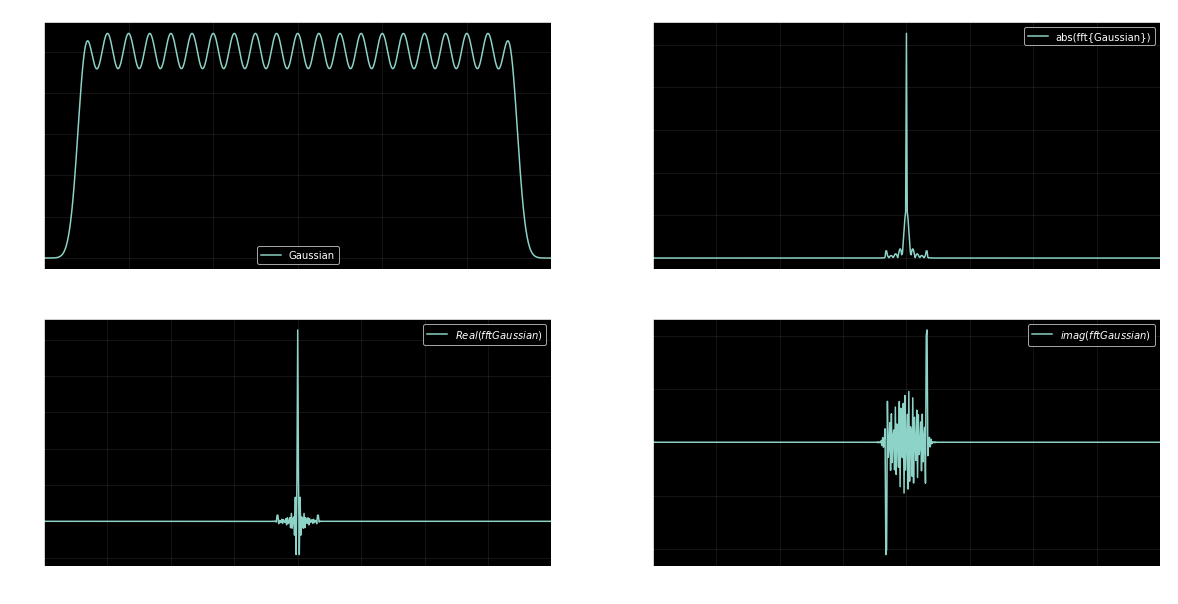

In [58]:
nGauss = 21
params = np.array([0])
spacing = 1.25
for g in range(nGauss):
    params = np.append(params, [1, -(spacing * (nGauss-1))/2 + g*spacing, 0.5])
field = arb_1d_sum.f(xpts, *params)
#field = bump.f(xpts,1,1,0.5,0)+bump.f(xpts,1,-1,0.5,0)
fftData = fa.fft(field, xpts)
fig, ax = plt.subplots(2,2,figsize=(20,10))
lims = [[-15,15],[-10,10],[-10,10],[-10,10]]
xplt = [xpts, fftData['Freq'], fftData['Freq'], fftData['Freq']]
yplt = [field, abs(fftData['Field']), fftData['Field'].real, fftData['Field'].imag]
labels=['Gaussian', 'abs(fft{Gaussian})', '$Real(fft{Gaussian})$', '$imag(fft{Gaussian})$']
xlabels= [ 'Space (arb)', 'Frequency (1/arb)','Frequency (1/arb)','Frequency (1/arb)' ]
ylabels= [ 'Signal', 'Amplitude', 'Amplitude', 'Amplitude' ]
titles = ['Gaussian', 'F{Gaussian}', 'F{Gausian}', 'F{Gaussian}']
for a, lim, xp, yp, legLabel, xlabel, ylabel, title in zip(ax.flatten(), lims, xplt, yplt, labels, xlabels, ylabels, titles):
    a.plot(xp,yp, label=legLabel)
    a.set_xlim(lim)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    a.set_title(title)
    a.legend()
    a.grid(alpha=0.1)

## Expected $\sigma_v$ for Harmonic Oscillator Ground State

Note: From Antoine's paper, (not sure can justify...)

$$
\sigma_0 = \sqrt{\frac{k_B T}{m\omega^2}}
$$

In [9]:
sig_0 = 39.4e-9*np.sqrt(2)/2
print(sig_0)

2.7860007178749977e-08


In [6]:
np.sqrt(mc.k_B*3.6e-6 / (mc.Rb87_M * (2*np.pi*150e3)**2))

1.969084553452787e-08

but this latter is I think the $\sigma_0$ of the probability distribution functiona nd so is a factor of root-2 off. Should verify Antoine's definition.

In [5]:
import scipy.optimize as opt
import sympy as sp
from Analysis_Python_Files.fitters.Gaussian import gaussian_2d, arb_2d_sum
from IPython.display import display

In [24]:
sp.init_printing(use_latex=True)

### 0th (heuristic) calculation:

After the atom is dropped, all of the atom's energy is converted (?) to kinetic energy. We can express this in terms of a temperature by setting the kinetic energy to k_B T:
$$
k_B T = \frac{\hbar \omega}{2}\rightarrow T = \frac{\hbar\omega}{2k_B}
$$

### 1st calculation

1D Ground State Wavefunction:
$$
\psi_0\{x\} = \Big( \frac{m\omega}{\pi \hbar}\Big)^{1/4} \exp\Big\{ -\frac{m\omega x^2}{2\hbar} \Big\}
$$

It's important to realize the interplay between the wavefunction and the probability distribution of the atom. $\sigma_x$ can be found by examining the Probability distribution:
$$
P\{x\} = \Big( \frac{m\omega}{\pi \hbar}\Big)^{1/2} \exp\Big\{ -\frac{m\omega x^2}{\hbar} \Big\}
$$

A normal distribution is defined in terms of the standard deviation or the distribution waist as 
$$\exp\{-\frac{x^2}{2\sigma_x^2}\}=\exp\{-\frac{2x^2}{w_x^2}\}$$

Therefore, by examination 
$$2\sigma_x^2 = \frac{2\hbar}{m\omega}\rightarrow\sigma_x = \sqrt{\frac{\hbar}{m\omega}}$$

We can derive the momentum distribution of the wavefunction and then find $\sigma_p$ in a similar fasion. The momentum space wavefunction is given by the fourier 
transform of the above wavefunction with $\exp\{ipx/\hbar\}$ as the fourier basis. Therefore, the momentum Space Wavefunction is:

$$
\Phi\{p_x\} = \frac{1}{(\pi m \omega \hbar)^{1/4}} \exp\Big\{ -\frac{p^2}{2\hbar m \omega} \Big\}
$$

Then we need to look at the momentum probability distribution:

$$
P\{p_x\} = \frac{1}{(\pi m \omega \hbar)^{1/2}} \exp\Big\{ -\frac{p^2}{\hbar m \omega} \Big\}
$$

Then
$$
2\sigma_p^2 = \hbar m\omega \rightarrow \sigma_p = \sqrt{\frac{m\hbar\omega}{2}}\\
\sigma_v = \frac{\sigma_p}{m} = \sqrt{\frac{\hbar\omega}{2m}}
$$

This can be used to create a "temperature" of the ground state. Normal thermal balistic expansions obey the relationship:
$$
\sigma_v = \sqrt{\frac{k_B T}{m}}
$$
therefore

$$T = \frac{m}{k_B} \sigma_v^2=\frac{\hbar \omega}{2k_B}$$

one might have guessed this was the answer, but it's hard to be sure about factors of 2 etc.

In [53]:
def getGroundStateTemp(omega): 
    return mc.hbar * omega / (2*mc.k_B)

In [51]:
from IPython.display import Latex

In [55]:
(0.006*0.02)

In [63]:
(0.01*0.2)*20e6

In [64]:
Latex(misc.round_sig_str(getGroundStateTemp(2*np.pi*150e3*1/np.sqrt(500))*1e6) + r' $\mu K$')

<IPython.core.display.Latex object>

### 2nd Calculation...

1D Ground State Wavefunction:
$$
\psi_0\{x\} = \Big( \frac{m\omega}{\pi \hbar}\Big)^{1/4} \exp\Big\{ -\frac{m\omega x^2}{2\hbar} \Big\}
$$

We have that the variance / std of an observable is defined as:

$$\sigma_p = \sqrt{\langle (p)^2 \rangle-\langle (p)\rangle^2}$$

the wavefunction is symmetric in position and momentum space, therefore the second term is zero, and

$$
\sigma_v =\frac{\sigma_p}{m} = \frac{1}{m}\sqrt{\langle p^2\rangle}
$$

Then analytically, we have

$$
\langle p^2\rangle = \sqrt{\frac{m\omega}{\pi \hbar}}\int [dx] \exp\bigg\{-\frac{m\omega x^2}{2\hbar}\bigg\}(-i\hbar \frac{d}{dx})^2 \exp\bigg\{-\frac{m\omega x^2}{2\hbar}\bigg\}
$$

We can evaluate this integral by hand or by using sympy:

In [49]:
omega, m, hbar = sp.symbols('omega m hbar', real=True, positive=True)
x = sp.symbols('x')
psi = (m*omega/(sp.pi*hbar))**(1/4) * sp.exp(-m*omega*x**2/(2*hbar))
sigma_P_integrand = psi * (-1j*hbar)**2* sp.diff(psi,x,x) # 2 x's in diff -> 2 derivatives
IPython.display.Markdown('result: $'+sp.latex(sp.simplify(sp.integrate(sigma_P_integrand,(x,-sp.oo,sp.oo))))+'$')

result: $0.5 \hbar m^{1.0} \omega^{1.0}$

Therefore

$$
\sigma_v = \frac{1}{m}\sqrt{\frac{\hbar m\omega}{2}} = \sqrt{\frac{\hbar\omega}{2m}}
$$

# Calculations of Eigenstates

# Bosons

$$
E_{h.o.} = \hbar \omega \Big(\frac{1}{e^{\hbar \omega / k_B T} - 1} + \frac{1}{2}\Big)
$$

### grand cannonical

$$ \bar{n} = \frac{1}{e^{E-\mu}-1}$$

### micro

$$ \bar{n} = \frac{1}{e^{\beta\hbar \omega}-1}$$

$$
e^{\beta \hbar \omega} = \frac{1+\bar{n}}{\bar{n}}\\
\chi =\beta \hbar \omega = \ln{\frac{1+\bar{n}}{\bar{n}}}
$$

probability in state:
$$
P(n) =  e^{-\beta E_n} / Z = 2 \sinh\Big\{\frac{\beta \hbar \omega}{2} \Big\} e^{-\beta (n +\frac{1}{2})\hbar \omega}\\
= 2 \sinh\Big\{\frac{\chi}{2} \Big\} e^{-\chi (n +\frac{1}{2})}\\
= 2 \sinh\Big\{\frac{\ln\Big\{ \frac{1+\bar{n}}{\bar{n}} \Big\}}{2} \Big\} \exp\Big\{-\ln\Big\{ \frac{1+\bar{n}}{\bar{n}} \Big\} (n +\frac{1}{2})\Big\}
$$

$$
= 2 \sinh\Big\{ \ln\Big\{\sqrt{\frac{1+\bar{n}}{\bar{n}}}\Big\} \Big\} \Big(\frac{1+\bar{n}}{\bar{n}}\Big)^{-(n+1/2)}
$$

In [4]:
import sympy as sp

In [7]:
sp.init_printing(use_latex=True)

In [94]:
nbar, n, alpha = sp.symbols('nbar, n, alpha', real=True, positive=True)

alpha = (1+nbar)/nbar

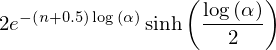

In [95]:
2*sp.sinh(sp.ln(alpha)/2)*sp.exp(-sp.ln(alpha)*(n+1/2))

In [96]:
sp.simplify(2*sp.sinh(sp.ln(alpha)/2)*sp.exp(-sp.ln(alpha)*(n+1/2)))

sympy doesn't seem to know that sinh(ln(x)) = (x^2-1)/(2x).

$$
= \alpha^{-(n+1/2)}\frac{(\alpha-1)}{\sqrt{\alpha}}
$$

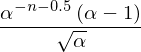

In [154]:
expr = alpha**(-(n+1/2))*(alpha-1)/(sp.sqrt(alpha))
expr

In [156]:
sp.simplify(expr.subs(alpha,(nbar+1)/nbar))

In [120]:
def prob(n,nbar):
    return nbar**n * (nbar+1)**(-n-1)

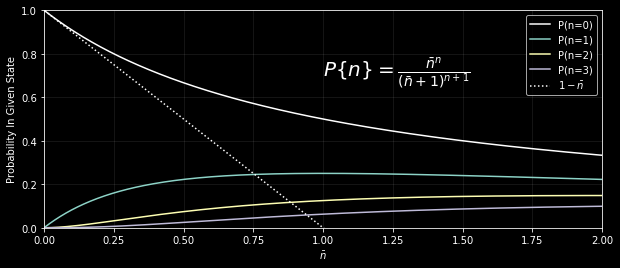

In [153]:
nbar = np.linspace(0,2,1001)[1:]
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(nbar, prob(0,nbar),'w', label='P(n=0)')
ax.plot(nbar, prob(1,nbar), label='P(n=1)')
ax.plot(nbar, prob(2,nbar), label='P(n=2)')
ax.plot(nbar, prob(3,nbar), label='P(n=3)')
ax.plot(nbar, 1-nbar, ':w', label=r'$1-\bar{n}$')
ax.set_xlim(0, max(nbar));
ax.set_xlabel(r'$\bar{n}$')
ax.set_ylabel('Probability In Given State')
ax.text(1,0.7,r'$P\{n\}=\frac{\bar{n}^n}{(\bar{n}+1)^{n+1}}$',fontsize=20)
ax.set_ylim(0, 1)
ax.legend();
ax.grid(alpha=0.1)

# Trap Shape Calculations

In [34]:
from fitters.Gaussian import arb_1d_sum, gaussian

In [ ]:
gaussian.f()

In [139]:
spacing=6*sigma
xpts = np.linspace(-4*sigma, (numG-1)*spacing + 4*sigma,10000)

In [197]:
numG = 12
sigma = 0.7e-6/2
spacing = 2.5*sigma
#spacing = 2e-6
xoffs = -((numG-1)*spacing/2 - (numG-1)*6*sigma/2)
print(xoffs)
amps = [-20 for _ in range(12)]
args = [0]
for num in range(numG):
    args.append(amps[num])
    args.append(xoffs + num*spacing)
    args.append(sigma)
ypts = arb_1d_sum.f(xpts, *args)

6.7374999999999994e-06


(-35, 1)

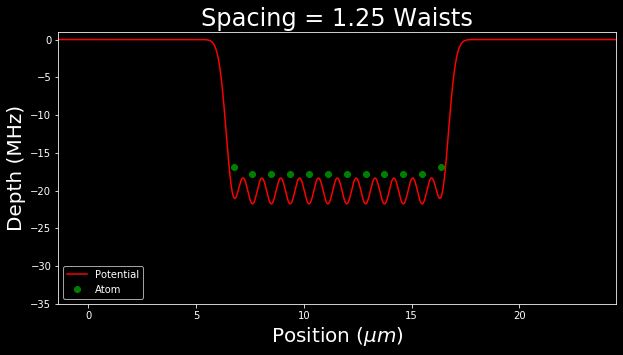

In [198]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(xpts*1e6,ypts, 'r', label='Potential')
for num, gparam in enumerate(np.reshape(args[1:], (numG, 3))):
    idx = (np.abs(xpts - gparam[1])).argmin()
    ax.plot(xpts[idx]*1e6,ypts[idx]+4, 'og', label='Atom' if num==0 else None )
ax.set_xlim(min(xpts*1e6), max(xpts*1e6))
plt.legend()
ax.set_title('Spacing = ' + misc.round_sig_str(spacing/(2*sigma)) + ' Waists', fontsize=24)
#ax.set_title('Depth = ' + misc.round_sig_str(amps[0]/20) + ' mK', fontsize=24)
ax.set_xlabel(r'Position $(\mu m)$', fontsize=20);
ax.set_ylabel(r'Depth (MHz)', fontsize=20);
ax.set_ylim(-35,1)

# Numbers

## Our previous numbers

### Definitions

$$
V \equiv \text{Trap Depth (an Energy)},\\
\Delta x \equiv \text{Distance between centers of gaussians (significantly different for onoly 2 wells than the distance between potential minima)}
$$

$$
J_{gg} \equiv \text{Ground-State Tunnel Coupling (an angular frequency)},\\
J_{eg} \equiv \text{Tunnel Coupling between ground and first radial excited state (an angular frequency)},\\
J_{ex} \equiv 2U_{eg} \equiv \text{Interaction energy between 1 atom in ground state and 1 in radial exited state (should be smaller than U_{gg})}$$

### MIE Paper:

With $$
\Delta x = 900nm,\\
V/h = 14.9 kHz,$$
we had
$$
J_{gg}/2\pi = 108 Hz,\\
J_{gg}/U_{gg} > 3
$$

### HOM Paper:

$$\frac{J_{gg}}{2\pi}\in [262, 348] \text{Hz}$$

At $V/h = 96 kHz, \Delta x = 808nm$, we had: $J_{gg}/2\pi = 120 Hz$  
At $V/h = 60 kHz, \Delta x = 805nm$, we had $J_{gg}/2\pi = 250 Hz$

Decay time: ~10ms for 262Hz. (not so great...)

### Spin Exchange Paper

$$
J_{ex}=2U_{eg} = \frac{4\pi\hbar^2 a_s}{m}\int|\psi_e\{r\}|^2|\psi_g\{r\}|^2d^3r
$$

$$
\frac{J_{ex}}{h} \in [120, 250] \text{Hz}
$$

Tunneling (note that tunneling in this ground to excited state, not the normal ground to ground):  
At $\Delta x = 715nm, V/h = 91kHz$, we had $J_{eg}/2\pi = 165 Hz$

VERY ROGUH (estimated by eye from figure 3c)
$$
\text{Depths} = [100, 120, 150, 160, 190, 240] kHz$$
Corresponding Exchange Energies:
$$
2U_{eg} = J_{ex} = h[120, 150, 160,  190, 215, 255] Hz
$$

### 3D array cooling to date:


Radial: $\bar{n}\sim 0.1$  
Axial: $\bar{n}\approx 0.2$

suggests a 3D ground-state population of 

In [159]:
0.9**2 * 0.83

and we should be able to do significantly better with the 1D array and further optimization.

### depth of focus

Rayleigh Range

$$z = \pi w_0^2 /\lambda$$

In [3]:
import numpy as np

In [4]:
def rayleighRange(w0, lam):
    return np.pi*w0**2/lam

In [8]:
print(rayleighRange(0.78e-6/2, 0.78e-6))
print(rayleighRange(32e-6, 0.78e-6))

6.126105674500097e-07
0.004124347278558907


In [9]:
0.004/40*1e6

100.0

## Numbers for Comparison

### Greiner / Bloch SF->MI paper:

$U/J \approx 36$ at Transition (3D, equiv in 1D should be $U/J \approx 12$

Expect transition at $U/J\approx z\times5.8$ where $z$ is the number of nearest neighbors in the lattice structure (2 in 1D, 4 in 2D, 6 in 3D)

Greiner does this by decreasing J (raising lattice), we would do this by increasing J (ramp down traps or ramp traps closer). That means we need J to be decently controlled when J\approx 10Hz, which is pretty low.

### Depth of focus

Andrea says their depth of focus is only about 3 um